In [12]:
# Kevin Philips Tanamas
# 220711789
# PMDPM - A

# Load Data
import pandas as pd
import numpy as np

df_diabetes = pd.read_csv('diabetes.csv')
df_diabetes.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [13]:
# Pengecekan data null, kosong, dan NaN
print("Data Null \n", df_diabetes.isnull().sum())
print("Data Kosong \n", df_diabetes.empty)
print("Data Nan \n", df_diabetes.isna().sum())

Data Null 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
Data Kosong 
 False
Data Nan 
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [14]:
# Pengecekan data duplikat -> tidak ditemukan data duplikat
print("Sebelum pengecekan data duplikat", df_diabetes.shape)
cols_to_check = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction",
                "Age", 'Outcome']

df_diabetes2 = df_diabetes[~df_diabetes[cols_to_check].duplicated(keep='last')]
print("Sesudah pengecekan data duplikat", df_diabetes2.shape)

Sebelum pengecekan data duplikat (768, 9)
Sesudah pengecekan data duplikat (768, 9)


In [15]:
# Train, test, split
from sklearn.model_selection import train_test_split

X = df_diabetes2.drop(columns=['Outcome'], axis=1)
y = df_diabetes2.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(576, 8)
(192, 8)


In [16]:
# Data Encoding menggunakan One Hot Encoder dan make_column_transformer 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

# Kolom yang bertipe String
cat_cols = []

transformer = make_column_transformer((OneHotEncoder(), cat_cols),
                                      remainder='passthrough')
X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.transform(X_test)

df_train_enc = pd.DataFrame(X_train_enc, columns=transformer.get_feature_names_out())
df_test_enc = pd.DataFrame(X_test_enc, columns=transformer.get_feature_names_out())

df_train_enc.head(10)
df_test_enc.head(10)

,remainder__Pregnancies,remainder__Glucose,remainder__BloodPressure,remainder__SkinThickness,remainder__Insulin,remainder__BMI,remainder__DiabetesPedigreeFunction,remainder__Age
0,1.0,199.0,76.0,43.0,0.0,42.9,1.394,22.0
1,2.0,107.0,74.0,30.0,100.0,33.6,0.404,23.0
2,4.0,76.0,62.0,0.0,0.0,34.0,0.391,25.0
3,5.0,166.0,72.0,19.0,175.0,25.8,0.587,51.0
4,0.0,111.0,65.0,0.0,0.0,24.6,0.660,31.0
5,1.0,81.0,72.0,18.0,40.0,26.6,0.283,24.0
6,9.0,152.0,78.0,34.0,171.0,34.2,0.893,33.0
7,3.0,176.0,86.0,27.0,156.0,33.3,1.154,52.0
8,2.0,127.0,58.0,24.0,275.0,27.7,1.600,25.0
9,6.0,103.0,72.0,32.0,190.0,37.7,0.324,55.0


In [17]:
# Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

pipe_svm = [('data scaling', MinMaxScaler()), 
            ('feature select', SelectPercentile()), 
            ('clf', SVC(kernel="rbf", class_weight='balanced'))
]

params_grid_svm = {
    'feature select__percentile' : [*np.arange(20,50,5)],
    'clf__C': [0.01, 0.1, 1, 10, 100],
    'clf__gamma' : [0.01, 0.1, 1, 10, 100]
}

estimator_svm = Pipeline(pipe_svm)
SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=89)
GSCV_SVM = GridSearchCV(estimator_svm, params_grid_svm, cv=SKF)
GSCV_SVM.fit(X_train_enc, y_train)
print("GSCV training finished")

GSCV training finished


CV Score : 0.7587106446776613
Test Score : 0.75
Best Model :  Pipeline(steps=[('data scaling', MinMaxScaler()),
                ('feature select', SelectPercentile(percentile=45)),
                ('clf', SVC(C=10, class_weight='balanced', gamma=1))])
Best Features :  Index(['remainder__Pregnancies', 'remainder__Glucose', 'remainder__BMI',
       'remainder__Age'],
      dtype='object')


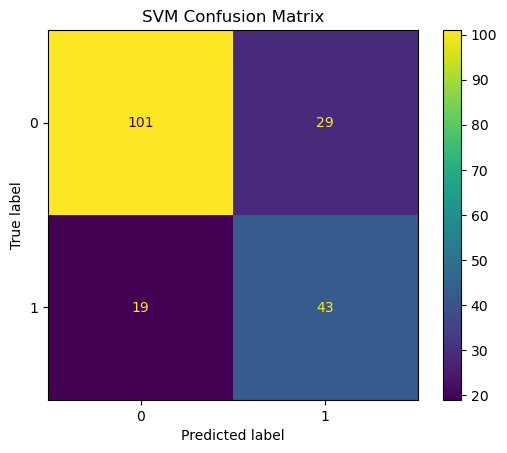

Classification Report SVM: 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       130
           1       0.60      0.69      0.64        62

    accuracy                           0.75       192
   macro avg       0.72      0.74      0.72       192
weighted avg       0.76      0.75      0.75       192



In [18]:
# Tampilkan skor cross-validation -> Pipeline
print("CV Score : {}".format(GSCV_SVM.best_score_))
print("Test Score : {}".format(GSCV_SVM.best_estimator_.score(X_test_enc, y_test)))
print("Best Model : ", GSCV_SVM.best_estimator_)
mask = GSCV_SVM.best_estimator_.named_steps['feature select'].get_support()
print("Best Features : ",df_train_enc.columns[mask])

SVM_pred = GSCV_SVM.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, SVM_pred, labels=GSCV_SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GSCV_SVM.classes_)
disp.plot()
plt.title("SVM Confusion Matrix")
plt.show()

print("Classification Report SVM: \n", classification_report(y_test, SVM_pred))

In [19]:
# Import library yang dibutuhkan -> Random Forest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import numpy as np

pipe_RF = [('data scaling', StandardScaler()),
          ('feature select', SelectKBest()),
          ('clf', RandomForestClassifier(random_state=89, class_weight='balanced')) # 2 digit terakhir npm -> 89
          ]

params_grid_RF = {
    'feature select__k': np.arange(1, 9),
    'clf__max_depth': np.arange(2, 6),
    'clf__n_estimators': [50, 100, 150, 200]
}

estimator_RF = Pipeline(pipe_RF)
GSCV_RF = GridSearchCV(estimator_RF, params_grid_RF, cv=SKF)
GSCV_RF.fit(X_train_enc, y_train)
print("GSCV training finished")


GSCV training finished


CV Score : 0.741424287856072
Test Score : 0.8072916666666666
Best Model :  Pipeline(steps=[('data scaling', StandardScaler()),
                ('feature select', SelectKBest(k=6)),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=3,
                                        random_state=89))])


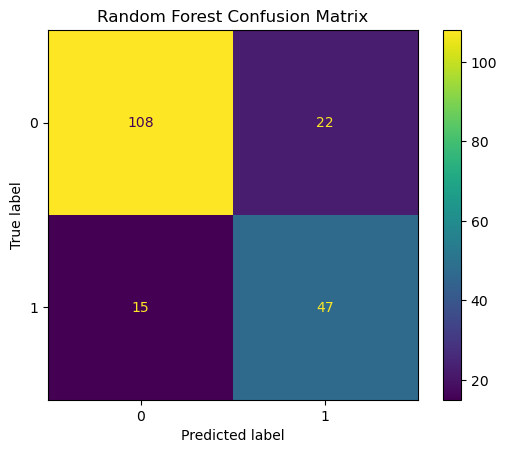

Classifiation Report SVM: 
               precision    recall  f1-score   support

           0       0.88      0.83      0.85       130
           1       0.68      0.76      0.72        62

    accuracy                           0.81       192
   macro avg       0.78      0.79      0.79       192
weighted avg       0.81      0.81      0.81       192



In [20]:
# Tampilkan hasil cross-validation -> Random Forest
print("CV Score : {}".format(GSCV_RF.best_score_))
print("Test Score : {}".format(GSCV_RF.best_estimator_.score(X_test_enc,y_test)))
print("Best Model : ", GSCV_RF.best_estimator_)
RF_pred = GSCV_RF.predict(X_test_enc)

import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, RF_pred, labels=GSCV_RF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=GSCV_RF.classes_)
disp.plot()
plt.title("Random Forest Confusion Matrix")
plt.show()

print("Classifiation Report SVM: \n", classification_report(y_test, RF_pred))